# Analytical Objectives

XYZ is an investment startup company in Indonesia which makes an application for the users to buy and sell mutual funds.

Provided mutual funds in the apps consist of:
- Stocks mutual fund,
- Bond mutual fund,
- Money Market mutual fund, and
- Mixed-investment mutual fund

Our objective is to <b>create a segmentation of users</b> for the upcoming thematic campaign and <b>give objective recommendations</b> on each campaign. By the end of the analysis, we will have campaigns based on the users' segmentation which will improve the effectiveness of the campaigns itself.

*italicized text*# New Section

# Data Preparation

In [ ]:
# import necessary libraries for data cleaning and EDA

import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# import the datasets

sheet_url = 'https://docs.google.com/spreadsheets/d/1Y4EdCS6DgdflozgD38mMZf3L9_CG8AYXvNQ6mA5Nrr8/edit#gid=0'
sheet_url_replace = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_users = pd.read_csv(sheet_url_replace)
df_users.head(10)

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,NaN,Gaji,0,0,0
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,NaN,Gaji,0,0,0
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,NaN,Gaji,0,0,0
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji,600000,100000,0
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,13500000,8500000,0
5,3049927,2021-08-29 03:56:26,Male,53,Swasta,< 10 Juta,NaN,Gaji,999000,149000,0
6,1407611,2021-09-23 20:55:59,Male,56,Swasta,> Rp 100 Juta - 500 Juta,NaN,Keuntungan Bisnis,0,0,0
7,3836491,2021-08-18 11:32:25,Male,59,Others,< 10 Juta,used referral,Lainnya,10000,0,0
8,3783302,2021-09-14 08:16:54,Male,57,Swasta,> Rp 50 Juta - 100 Juta,NaN,Gaji,110431,1000000,-1889569
9,3718933,2021-08-09 18:59:44,Male,50,Pengusaha,> Rp 100 Juta - 500 Juta,NaN,Keuntungan Bisnis,500000,0,0


In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1pM6N_8z_-n2GOLmHNr5pAR9OcfV2cyL5-UIf7L3yfPE/edit#gid=0'
sheet_url_replace = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_transactions = pd.read_csv(sheet_url_replace)
df_transactions.head(10)

,user_id,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,50701,2021-08-30,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,0,0,NaN,NaN,NaN,10000000.000,10000000
1,50701,2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,0,0,NaN,NaN,NaN,10000000.000,10000000
2,50701,2021-09-01,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,0,0,NaN,NaN,NaN,10000000.000,10000000
3,50701,2021-09-02,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,0,0,NaN,NaN,NaN,10000000.000,10000000
4,50701,2021-09-03,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,0,0,NaN,NaN,NaN,10000000.000,10000000
5,50701,2021-09-06,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,0,0,NaN,NaN,NaN,10000000.000,10000000
6,50701,2021-09-07,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,0,0,NaN,NaN,NaN,10000000.000,10000000
7,50701,2021-09-08,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,0,0,NaN,NaN,NaN,10000000.000,10000000
8,50701,2021-09-09,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,0,0,NaN,NaN,NaN,10000000.000,10000000
9,50701,2021-09-10,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,0,0,NaN,NaN,NaN,10000000.000,10000000


# Data Cleaning

## Users dataframe

### Check dataset informations

In [ ]:
df_users_copy = df_users.copy()

df_users_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   user_id                       14712 non-null  int64 
 1   registration_import_datetime  14712 non-null  object
 2   user_gender                   14712 non-null  object
 3   user_age                      14712 non-null  int64 
 4   user_occupation               14712 non-null  object
 5   user_income_range             14712 non-null  object
 6   referral_code_used            5604 non-null   object
 7   user_income_source            14712 non-null  object
 8   end_of_month_invested_amount  14712 non-null  int64 
 9   total_buy_amount              14712 non-null  int64 
 10  total_sell_amount             14712 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 1.2+ MB


In [ ]:
df_users_copy.head(10)

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,NaN,Gaji,0,0,0
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,NaN,Gaji,0,0,0
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,NaN,Gaji,0,0,0
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji,600000,100000,0
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,13500000,8500000,0
5,3049927,2021-08-29 03:56:26,Male,53,Swasta,< 10 Juta,NaN,Gaji,999000,149000,0
6,1407611,2021-09-23 20:55:59,Male,56,Swasta,> Rp 100 Juta - 500 Juta,NaN,Keuntungan Bisnis,0,0,0
7,3836491,2021-08-18 11:32:25,Male,59,Others,< 10 Juta,used referral,Lainnya,10000,0,0
8,3783302,2021-09-14 08:16:54,Male,57,Swasta,> Rp 50 Juta - 100 Juta,NaN,Gaji,110431,1000000,-1889569
9,3718933,2021-08-09 18:59:44,Male,50,Pengusaha,> Rp 100 Juta - 500 Juta,NaN,Keuntungan Bisnis,500000,0,0


Insights so far:
- all rows filled expect referral_code_used, which is NOT a necessary row to be filled. collumn will be further checked later
- datetime is still string, need to convert it to datetime
- total_sell_amount have minus in the value, which should be removed in order to simplify future calculations

### Check for values and typos

*only check for string collumns without unique values, as collumn with unique values will be checked later for potential duplicates, etc.

In [ ]:
#check the values for user_gender
df_users_copy[df_users_copy.columns[2]].value_counts()

Male      8977
Female    5735
Name: user_gender, dtype: int64

In [ ]:
#check the values for user_occupation
df_users_copy[df_users_copy.columns[4]].value_counts()

Pelajar       7887
Swasta        3263
Others        1683
IRT            934
Pengusaha      598
PNS            191
Guru           106
TNI/Polisi      45
Pensiunan        5
Name: user_occupation, dtype: int64

In [ ]:
#check the values for user_income_range
df_users_copy[df_users_copy.columns[5]].value_counts()

< 10 Juta                   6275
Rp 10 Juta - 50 Juta        4816
> Rp 50 Juta - 100 Juta     2390
> Rp 100 Juta - 500 Juta    1114
> Rp 500 Juta - 1 Miliar      90
> Rp 1 Miliar                 27
Name: user_income_range, dtype: int64

In [ ]:
#check the values for referral_code_used
df_users_copy[df_users_copy.columns[6]].value_counts()

used referral    5604
Name: referral_code_used, dtype: int64

In [ ]:
#check the values for user_income_source
df_users_copy[df_users_copy.columns[7]].value_counts()

Gaji                     9131
Keuntungan Bisnis        1908
Dari Orang Tua / Anak    1307
Undian                   1001
Tabungan                  419
Lainnya                   414
Dari Suami / istri        300
Hasil Investasi           165
Warisan                    43
Bunga Simpanan             24
Name: user_income_source, dtype: int64

Insights so far:
- no typos on the dataset
- empty data inside referral_code_used can be filled with 'no referral' OR remove the column entirely because it will not be used in the segmentation
- user_income_range column can be changed to a more simplify value, such as grouping by letter and put notes for the letters later on
- user_income_source have unusual enum called 'Undian'. needs to be checked to higher-ups, for now we remove this column
- in user_occupation, 'Pensiunan' can be grouped into 'Others' as they have too little of a sample themselves compared to others. another recommendation is to remove the column entirely as we only need to segment based on the income and the datas aren't descriptive enough, proven with many user considered as 'Others' more than any other occupation

### Treat values base on insights

In [ ]:
#remove referral_code_used and user_income_source, then check

df_users_copy.drop(columns = 'referral_code_used', inplace = True)
df_users_copy.drop(columns = 'user_income_source', inplace = True)

# df_users_copy.columns

In [ ]:
#group user_income_range with letters
x = df_users_copy['user_income_range']

df_users_copy.loc[(x == '< 10 Juta'), 'user_income_grouping'] = 'E'
df_users_copy.loc[(x == 'Rp 10 Juta - 50 Juta'), 'user_income_grouping'] = 'D'
df_users_copy.loc[(x == '> Rp 50 Juta - 100 Juta'), 'user_income_grouping'] = 'C'
df_users_copy.loc[(x == '> Rp 100 Juta - 500 Juta'), 'user_income_grouping'] = 'B'
df_users_copy.loc[(x == '> Rp 500 Juta - 1 Miliar') | (x == '> Rp 1 Miliar'), 'user_income_grouping'] = 'A'

In [ ]:
df_users_copy['user_income_grouping'].value_counts()

E    6275
D    4816
C    2390
B    1114
A     117
Name: user_income_grouping, dtype: int64

In [ ]:
#replace penisunan with others in user_occupation OR remove the column
#please uncomment later if after further discussion we will keep one or the other

# df_users_copy['user_occupation'] = df_users_copy['user_occupation'].replace('Pensiunan','Others')
# df_users_copy['user_occupation'].value_counts()

df_users_copy.drop(columns = 'user_occupation', inplace = True)

Insights so far:
- new collumn has been created as user_income_grouping, later on have the option to drop user_income_range. we will filter out in the end
- referal_code, user_income_sources, and user_occupation collumn have been removed

### Check duplicates

In [ ]:
#check duplicates
df_users_copy[df_users_copy['user_id'].duplicated()]

,user_id,registration_import_datetime,user_gender,user_age,user_income_range,end_of_month_invested_amount,total_buy_amount,total_sell_amount,user_income_grouping


Insights so far:
- All datas inside the dataset are unique and there are no duplicated datas inside

### Remove negative values

In [ ]:
#remove minuses in total_sell_amount aka change negative values into absolute values

df_users_copy['total_sell_amount'] = np.abs(df_users_copy['total_sell_amount'])

In [ ]:
df_users_copy['total_sell_amount'].value_counts()

0          12216
10000        494
100000       440
200000       112
500000        75
           ...  
201309         1
95000          1
481057         1
1800000        1
1250000        1
Name: total_sell_amount, Length: 548, dtype: int64

Insights so far:
- All negative values have been turned into absolute values

### Change string to datetime

In [ ]:
#change registration_import_datetime datatype to datetime from string

df_users_copy['registration_import_datetime'] = pd.to_datetime(df_users_copy['registration_import_datetime'])
df_users_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       14712 non-null  int64         
 1   registration_import_datetime  14712 non-null  datetime64[ns]
 2   user_gender                   14712 non-null  object        
 3   user_age                      14712 non-null  int64         
 4   user_income_range             14712 non-null  object        
 5   end_of_month_invested_amount  14712 non-null  int64         
 6   total_buy_amount              14712 non-null  int64         
 7   total_sell_amount             14712 non-null  int64         
 8   user_income_grouping          14712 non-null  object        
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 1.0+ MB


Insights so far:
- registration_import_datetime collumn data type changed to datetime

### Remove user income range (optional)

In [ ]:
# remove user_income_range for view simplicity, we can refer back to df_user_copy if we decided to use range instead of the grouping

df_users_copy1 = df_users_copy.copy()

df_users_copy1.drop(columns = 'user_income_range', inplace = True)

### Final Users Dataframe

In [ ]:
df_users = df_users_copy1.copy()

df_users.head(10)

,user_id,registration_import_datetime,user_gender,user_age,end_of_month_invested_amount,total_buy_amount,total_sell_amount,user_income_grouping
0,162882,2021-09-17 14:10:44,Female,51,0,0,0,A
1,3485491,2021-10-09 11:11:34,Female,55,0,0,0,C
2,1071649,2021-10-08 01:27:30,Male,50,0,0,0,D
3,3816789,2021-08-12 07:19:32,Female,53,600000,100000,0,C
4,3802293,2021-08-15 09:31:24,Female,47,13500000,8500000,0,A
5,3049927,2021-08-29 03:56:26,Male,53,999000,149000,0,E
6,1407611,2021-09-23 20:55:59,Male,56,0,0,0,B
7,3836491,2021-08-18 11:32:25,Male,59,10000,0,0,E
8,3783302,2021-09-14 08:16:54,Male,57,110431,1000000,1889569,C
9,3718933,2021-08-09 18:59:44,Male,50,500000,0,0,B


## Transactions dataframe

### Check dataset informations

In [ ]:
df_transactions_copy = df_transactions.copy()

df_transactions_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 17 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   user_id                                   158811 non-null  int64  
 1   date                                      158811 non-null  object 
 2   buy_saham_transaction_amount              99031 non-null   float64
 3   sell_saham_transaction_amount             1808 non-null    float64
 4   buy_pasar_uang_transaction_amount         122263 non-null  float64
 5   sell_pasar_uang_transaction_amount        2010 non-null    float64
 6   buy_pendapatan_tetap_transaction_amount   98916 non-null   float64
 7   sell_pendapatan_tetap_transaction_amount  1581 non-null    float64
 8   buy_campuran_transaction_amount           5072 non-null    float64
 9   sell_campuran_transaction_amount          46 non-null      float64
 10  total_buy_transactio

In [ ]:
df_transactions_copy.head(10)

,user_id,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,50701,2021-08-30,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,0,0,NaN,NaN,NaN,10000000.000,10000000
1,50701,2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,0,0,NaN,NaN,NaN,10000000.000,10000000
2,50701,2021-09-01,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,0,0,NaN,NaN,NaN,10000000.000,10000000
3,50701,2021-09-02,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,0,0,NaN,NaN,NaN,10000000.000,10000000
4,50701,2021-09-03,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,0,0,NaN,NaN,NaN,10000000.000,10000000
5,50701,2021-09-06,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,0,0,NaN,NaN,NaN,10000000.000,10000000
6,50701,2021-09-07,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,0,0,NaN,NaN,NaN,10000000.000,10000000
7,50701,2021-09-08,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,0,0,NaN,NaN,NaN,10000000.000,10000000
8,50701,2021-09-09,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,0,0,NaN,NaN,NaN,10000000.000,10000000
9,50701,2021-09-10,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,0,0,NaN,NaN,NaN,10000000.000,10000000


Insights so far:
- some columns beside user_id still in integer. will change to float in order to maintain consistency (or vice versa)
- date needs to be changed to datetime
- lot of rows with missing values. based on the understanding of the table, the columns with null values mean that users didn't have any transaction. which means we can replace all null value with zero

### Fix datatypes

In [ ]:
#change date datatype to datetime from string

df_transactions_copy['date'] = pd.to_datetime(df_transactions_copy['date'])
df_transactions_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 17 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   user_id                                   158811 non-null  int64         
 1   date                                      158811 non-null  datetime64[ns]
 2   buy_saham_transaction_amount              99031 non-null   float64       
 3   sell_saham_transaction_amount             1808 non-null    float64       
 4   buy_pasar_uang_transaction_amount         122263 non-null  float64       
 5   sell_pasar_uang_transaction_amount        2010 non-null    float64       
 6   buy_pendapatan_tetap_transaction_amount   98916 non-null   float64       
 7   sell_pendapatan_tetap_transaction_amount  1581 non-null    float64       
 8   buy_campuran_transaction_amount           5072 non-null    float64       
 9   sell_campuran_t

In [ ]:
#change integer datatype to float

df_transactions_copy = df_transactions_copy.astype({"total_buy_transaction_amount":"float","total_sell_transaction_amount":"float","total_invested_amount":"float"})
df_transactions_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 17 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   user_id                                   158811 non-null  int64         
 1   date                                      158811 non-null  datetime64[ns]
 2   buy_saham_transaction_amount              99031 non-null   float64       
 3   sell_saham_transaction_amount             1808 non-null    float64       
 4   buy_pasar_uang_transaction_amount         122263 non-null  float64       
 5   sell_pasar_uang_transaction_amount        2010 non-null    float64       
 6   buy_pendapatan_tetap_transaction_amount   98916 non-null   float64       
 7   sell_pendapatan_tetap_transaction_amount  1581 non-null    float64       
 8   buy_campuran_transaction_amount           5072 non-null    float64       
 9   sell_campuran_t

Insights so far:
- all datatypes have been fixed accordingly

### Check duplicates

In [ ]:
#check potential duplicates using user_id AND date as its subset
s = df_transactions_copy.copy()

s = s[s.duplicated(subset=['user_id','date'], keep=False)]
s

,user_id,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount


Insights so far:
- There are no duplicates inside the dataframe

### Handle missing values

In [ ]:
#replace all null value with zero
df_transactions_copy = df_transactions_copy.fillna(0)

In [ ]:
df_transactions_copy.head()

,user_id,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,50701,2021-08-30,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,10000000.000,10000000.000
1,50701,2021-08-31,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,10000000.000,10000000.000
2,50701,2021-09-01,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,10000000.000,10000000.000
3,50701,2021-09-02,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,10000000.000,10000000.000
4,50701,2021-09-03,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,10000000.000,10000000.000


In [ ]:
df_transactions_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 17 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   user_id                                   158811 non-null  int64         
 1   date                                      158811 non-null  datetime64[ns]
 2   buy_saham_transaction_amount              158811 non-null  float64       
 3   sell_saham_transaction_amount             158811 non-null  float64       
 4   buy_pasar_uang_transaction_amount         158811 non-null  float64       
 5   sell_pasar_uang_transaction_amount        158811 non-null  float64       
 6   buy_pendapatan_tetap_transaction_amount   158811 non-null  float64       
 7   sell_pendapatan_tetap_transaction_amount  158811 non-null  float64       
 8   buy_campuran_transaction_amount           158811 non-null  float64       
 9   sell_campuran_t

Insights so far:
- all null datas have been replaced by zero

### Final Transactions Dataframe

In [ ]:
df_transactions = df_transactions_copy.copy()

df_transactions.head(10)

,user_id,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,50701,2021-08-30,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,10000000.000,10000000.000
1,50701,2021-08-31,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,10000000.000,10000000.000
2,50701,2021-09-01,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,10000000.000,10000000.000
3,50701,2021-09-02,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,10000000.000,10000000.000
4,50701,2021-09-03,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,10000000.000,10000000.000
5,50701,2021-09-06,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,10000000.000,10000000.000
6,50701,2021-09-07,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,10000000.000,10000000.000
7,50701,2021-09-08,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,10000000.000,10000000.000
8,50701,2021-09-09,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,10000000.000,10000000.000
9,50701,2021-09-10,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,10000000.000,10000000.000


## Merge dataframes

In [ ]:
#check last date transaction in the dataframe
df_transactions['date'].value_counts()

2021-09-30    8277
2021-09-29    8007
2021-09-28    7593
2021-09-27    7416
2021-09-24    7257
2021-09-23    7094
2021-09-22    6921
2021-09-21    6488
2021-09-20    6368
2021-09-17    6190
2021-09-16    6024
2021-09-15    5841
2021-09-14    5405
2021-09-13    5237
2021-09-10    5038
2021-09-09    4862
2021-09-08    4674
2021-09-07    4200
2021-09-06    4032
2021-09-03    3830
2021-09-02    3584
2021-09-01    3428
2021-08-31    3075
2021-08-30    2926
2021-08-27    2774
2021-08-26    2643
2021-08-25    2528
2021-08-24    2227
2021-08-23    2095
2021-08-20    1973
2021-08-19    1768
2021-08-17    1474
2021-08-18    1474
2021-08-16    1350
2021-08-13    1117
2021-08-12     991
2021-08-11     991
2021-08-10     577
2021-08-09     426
2021-08-06     315
2021-08-05     204
2021-08-04     117
Name: date, dtype: int64

In [ ]:
#get the only last date transaction (2021-09-30) row for each user_id, and remove date to clean the table

df_transactions_last = df_transactions[df_transactions['date'] == '2021-09-30']
df_transactions_last.head(10)

,user_id,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
23,50701,2021-09-30,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,10000000.000,10000000.000
46,50961,2021-09-30,300000.000,0.000,600000.000,0.000,1200000.000,0.000,0.000,0.000,2100000.000,0.000,2000000.000,700000.000,1400000.000,0.000,4100000.000
74,53759,2021-09-30,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,70000.000,10000.000,20000.000,0.000,100000.000
99,54759,2021-09-30,0.000,0.000,2000000.000,0.000,0.000,0.000,0.000,0.000,2000000.000,0.000,0.000,12000000.000,0.000,0.000,12000000.000
136,61414,2021-09-30,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
155,66145,2021-09-30,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,240000.000,30000.000,130000.000,0.000,400000.000
174,67251,2021-09-30,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,570000.000,110000.000,420000.000,0.000,1100000.000
188,70568,2021-09-30,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,60000.000,10000.000,130000.000,0.000,200000.000
225,71229,2021-09-30,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
238,72676,2021-09-30,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,59853.000,110000.000,80000.000,0.000,249853.000


In [ ]:
#merge the dataframes
df_merged = df_users.merge(df_transactions_last, how='inner', left_on =['user_id'], right_on = ['user_id'])
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8277 entries, 0 to 8276
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   user_id                                   8277 non-null   int64         
 1   registration_import_datetime              8277 non-null   datetime64[ns]
 2   user_gender                               8277 non-null   object        
 3   user_age                                  8277 non-null   int64         
 4   end_of_month_invested_amount              8277 non-null   int64         
 5   total_buy_amount                          8277 non-null   int64         
 6   total_sell_amount                         8277 non-null   int64         
 7   user_income_grouping                      8277 non-null   object        
 8   date                                      8277 non-null   datetime64[ns]
 9   buy_saham_transaction_amount  

### Remove duplicates and unnecessary columns

In [ ]:
#check how the merged dataframe looks like
df_merged.head(10)

,user_id,registration_import_datetime,user_gender,user_age,end_of_month_invested_amount,total_buy_amount,total_sell_amount,user_income_grouping,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,3816789,2021-08-12 07:19:32,Female,53,600000,100000,0,C,2021-09-30,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,290000.000,40000.000,270000.000,0.000,600000.000
1,3802293,2021-08-15 09:31:24,Female,47,13500000,8500000,0,A,2021-09-30,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,8920000.000,1350000.000,3230000.000,0.000,13500000.000
2,3049927,2021-08-29 03:56:26,Male,53,999000,149000,0,E,2021-09-30,0.000,0.000,0.000,0.000,0.000,0.000,149000.000,0.000,149000.000,0.000,40000.000,10000.000,50000.000,899000.000,999000.000
3,3836491,2021-08-18 11:32:25,Male,59,10000,0,0,E,2021-09-30,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,10000.000,0.000,0.000,10000.000
4,3783302,2021-09-14 08:16:54,Male,57,110431,1000000,1889569,C,2021-09-30,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,110431.000,0.000,110431.000
5,3718933,2021-08-09 18:59:44,Male,50,500000,0,0,B,2021-09-30,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,240000.000,40000.000,220000.000,0.000,500000.000
6,3820160,2021-08-12 19:08:59,Female,58,225000,105000,0,C,2021-09-30,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,60000.000,20000.000,145000.000,0.000,225000.000
7,3770075,2021-08-06 13:41:26,Male,54,50000,10000,0,E,2021-09-30,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,50000.000,0.000,0.000,50000.000
8,3802815,2021-08-10 16:46:14,Female,53,300000,0,0,B,2021-09-30,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,170000.000,20000.000,110000.000,0.000,300000.000
9,3777767,2021-08-06 18:58:14,Male,57,100000,0,0,D,2021-09-30,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,10000.000,20000.000,70000.000,0.000,100000.000


In [ ]:
#check if there are any discrepancy datas between these two columns

s = df_merged[df_merged['end_of_month_invested_amount'] != df_merged['total_invested_amount'].astype(int)]
s

,user_id,registration_import_datetime,user_gender,user_age,end_of_month_invested_amount,total_buy_amount,total_sell_amount,user_income_grouping,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount


Insights so far:
- date can be removed for this dataframe as it doesn't provide any insight considering all data have the same last date transaction, the same logic goes to other each transaction details per date. Insights can be taken from the total for each mutual funds per user
- end_of_month_invested_amount and total_invested_amount have the same amounts in each user with no duplicates. it's recommended to remove one of the columns

### Final Merged Dataframe

In [ ]:
df_merged_final = df_merged.copy()
df_merged_final.drop(columns = 'total_invested_amount', inplace = True)
df_merged_final.drop(columns = ['date', 'buy_saham_transaction_amount', 'sell_saham_transaction_amount', 'buy_pasar_uang_transaction_amount', 'sell_pasar_uang_transaction_amount', 'buy_pendapatan_tetap_transaction_amount', 'sell_pendapatan_tetap_transaction_amount', 'buy_campuran_transaction_amount', 'sell_campuran_transaction_amount', 'total_buy_transaction_amount', 'total_sell_transaction_amount'], inplace = True)

In [ ]:
df_merged_final.head(10)

,user_id,registration_import_datetime,user_gender,user_age,end_of_month_invested_amount,total_buy_amount,total_sell_amount,user_income_grouping,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount
0,3816789,2021-08-12 07:19:32,Female,53,600000,100000,0,C,290000.000,40000.000,270000.000,0.000
1,3802293,2021-08-15 09:31:24,Female,47,13500000,8500000,0,A,8920000.000,1350000.000,3230000.000,0.000
2,3049927,2021-08-29 03:56:26,Male,53,999000,149000,0,E,40000.000,10000.000,50000.000,899000.000
3,3836491,2021-08-18 11:32:25,Male,59,10000,0,0,E,0.000,10000.000,0.000,0.000
4,3783302,2021-09-14 08:16:54,Male,57,110431,1000000,1889569,C,0.000,0.000,110431.000,0.000
5,3718933,2021-08-09 18:59:44,Male,50,500000,0,0,B,240000.000,40000.000,220000.000,0.000
6,3820160,2021-08-12 19:08:59,Female,58,225000,105000,0,C,60000.000,20000.000,145000.000,0.000
7,3770075,2021-08-06 13:41:26,Male,54,50000,10000,0,E,0.000,50000.000,0.000,0.000
8,3802815,2021-08-10 16:46:14,Female,53,300000,0,0,B,170000.000,20000.000,110000.000,0.000
9,3777767,2021-08-06 18:58:14,Male,57,100000,0,0,D,10000.000,20000.000,70000.000,0.000


## Checking Outliers

In [ ]:
df_merged_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8277 entries, 0 to 8276
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   user_id                           8277 non-null   int64         
 1   registration_import_datetime      8277 non-null   datetime64[ns]
 2   user_gender                       8277 non-null   object        
 3   user_age                          8277 non-null   int64         
 4   end_of_month_invested_amount      8277 non-null   int64         
 5   total_buy_amount                  8277 non-null   int64         
 6   total_sell_amount                 8277 non-null   int64         
 7   user_income_grouping              8277 non-null   object        
 8   saham_invested_amount             8277 non-null   float64       
 9   pasar_uang_invested_amount        8277 non-null   float64       
 10  pendapatan_tetap_invested_amount  8277 non-null 

In [ ]:
#group based on user_income_grouping to maintain consistency, as in theory we cannot group those with low income and high income together

df_invested_only = df_merged_final[df_merged_final["end_of_month_invested_amount"] != 0]
# df_invested_only = df_merged_final

df_a = df_invested_only[df_invested_only["user_income_grouping"] == "A"]
df_b = df_invested_only[df_invested_only["user_income_grouping"] == "B"]
df_c = df_invested_only[df_invested_only["user_income_grouping"] == "C"]
df_d = df_invested_only[df_invested_only["user_income_grouping"] == "D"]
df_e = df_invested_only[df_invested_only["user_income_grouping"] == "E"]

### Initial boxplot and insights

<AxesSubplot:xlabel='end_of_month_invested_amount'>

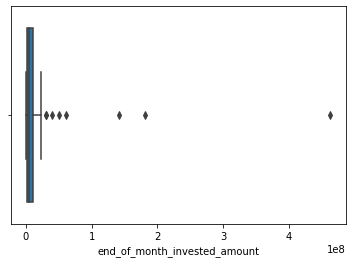

In [ ]:
sns.boxplot(data = df_a , x ="end_of_month_invested_amount")

<AxesSubplot:xlabel='end_of_month_invested_amount'>

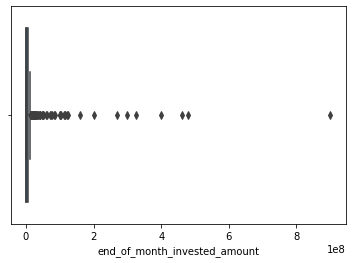

In [ ]:
sns.boxplot(data = df_b , x ="end_of_month_invested_amount")

<AxesSubplot:xlabel='end_of_month_invested_amount'>

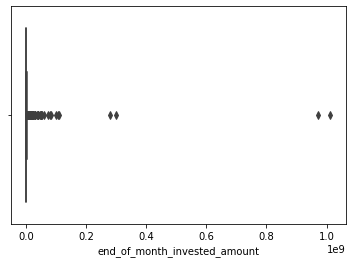

In [ ]:
sns.boxplot(data = df_c , x ="end_of_month_invested_amount")

<AxesSubplot:xlabel='end_of_month_invested_amount'>

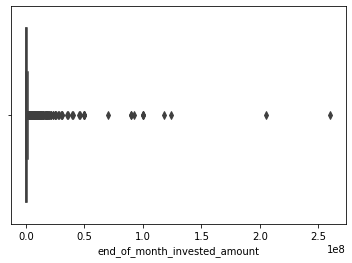

In [ ]:
sns.boxplot(data = df_d , x ="end_of_month_invested_amount")

<AxesSubplot:xlabel='end_of_month_invested_amount'>

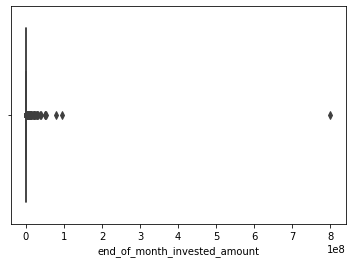

In [ ]:
sns.boxplot(data = df_e , x ="end_of_month_invested_amount")

From the boxplots, there is no outlier from the lower bound but there are lots of outlier detected based on the upper bound even though we already group the users based on their income. In order to not ruin our upcoming analysis, we decided to trim some of the data using IQR formula

### Filtering Invested Amount

<AxesSubplot:xlabel='end_of_month_invested_amount'>

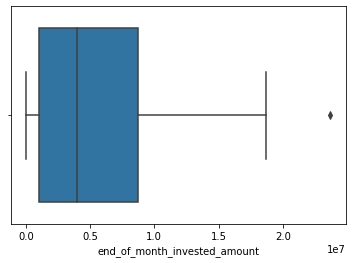

In [ ]:
#filter dataframe from group A, and check the result using boxplot

Q1 = df_a["end_of_month_invested_amount"].quantile(0.25)
Q3 = df_a["end_of_month_invested_amount"].quantile(0.75)

IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

filter_lower = df_a["end_of_month_invested_amount"] < lower_limit
filter_upper = df_a["end_of_month_invested_amount"] > upper_limit

df_a_cleaned = df_a[~filter_lower & ~filter_upper]

sns.boxplot(data = df_a_cleaned , x ="end_of_month_invested_amount")

<AxesSubplot:xlabel='end_of_month_invested_amount'>

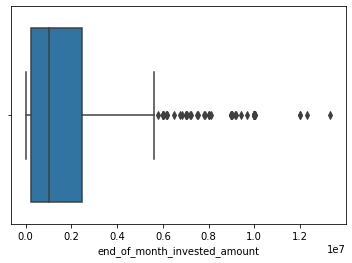

In [ ]:
#filter dataframe from group B

Q1 = df_b["end_of_month_invested_amount"].quantile(0.25)
Q3 = df_b["end_of_month_invested_amount"].quantile(0.75)

IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

filter_lower = df_b["end_of_month_invested_amount"] < lower_limit
filter_upper = df_b["end_of_month_invested_amount"] > upper_limit

df_b_cleaned = df_b[~filter_lower & ~filter_upper]

sns.boxplot(data = df_b_cleaned , x ="end_of_month_invested_amount")

<AxesSubplot:xlabel='end_of_month_invested_amount'>

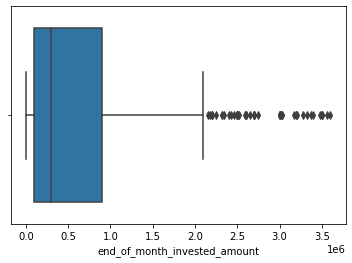

In [ ]:
#filter dataframe from group C

Q1 = df_c["end_of_month_invested_amount"].quantile(0.25)
Q3 = df_c["end_of_month_invested_amount"].quantile(0.75)

IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

filter_lower = df_c["end_of_month_invested_amount"] < lower_limit
filter_upper = df_c["end_of_month_invested_amount"] > upper_limit

df_c_cleaned = df_c[~filter_lower & ~filter_upper]

sns.boxplot(data = df_c_cleaned , x ="end_of_month_invested_amount")

<AxesSubplot:xlabel='end_of_month_invested_amount'>

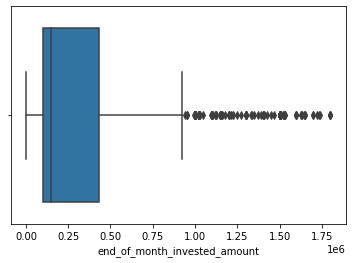

In [ ]:
#filter dataframe from group D

Q1 = df_d["end_of_month_invested_amount"].quantile(0.25)
Q3 = df_d["end_of_month_invested_amount"].quantile(0.75)

IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

filter_lower = df_d["end_of_month_invested_amount"] < lower_limit
filter_upper = df_d["end_of_month_invested_amount"] > upper_limit

df_d_cleaned = df_d[~filter_lower & ~filter_upper]

sns.boxplot(data = df_d_cleaned , x ="end_of_month_invested_amount")

<AxesSubplot:xlabel='end_of_month_invested_amount'>

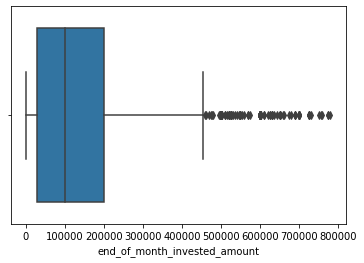

In [ ]:
#filter dataframe from group E

Q1 = df_e["end_of_month_invested_amount"].quantile(0.25)
Q3 = df_e["end_of_month_invested_amount"].quantile(0.75)

IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

filter_lower = df_e["end_of_month_invested_amount"] < lower_limit
filter_upper = df_e["end_of_month_invested_amount"] > upper_limit

df_e_cleaned = df_e[~filter_lower & ~filter_upper]

sns.boxplot(data = df_e_cleaned , x ="end_of_month_invested_amount")

All of the datas distribution are better, although there are still outliers in each group. For now, it's better to leave them be as too much deleted datas are quite detrimental in the analysis accuracy itself

### Final Cleaned Dataframe

In [ ]:
#after all of that, union the dataframes

frames = [df_a_cleaned, df_b_cleaned, df_c_cleaned, df_d_cleaned, df_e_cleaned]

df_final = pd.concat(frames)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5305 entries, 1 to 8258
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   user_id                           5305 non-null   int64         
 1   registration_import_datetime      5305 non-null   datetime64[ns]
 2   user_gender                       5305 non-null   object        
 3   user_age                          5305 non-null   int64         
 4   end_of_month_invested_amount      5305 non-null   int64         
 5   total_buy_amount                  5305 non-null   int64         
 6   total_sell_amount                 5305 non-null   int64         
 7   user_income_grouping              5305 non-null   object        
 8   saham_invested_amount             5305 non-null   float64       
 9   pasar_uang_invested_amount        5305 non-null   float64       
 10  pendapatan_tetap_invested_amount  5305 non-null 

In [ ]:
df_final

,user_id,registration_import_datetime,user_gender,user_age,end_of_month_invested_amount,total_buy_amount,total_sell_amount,user_income_grouping,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount
1,3802293,2021-08-15 09:31:24,Female,47,13500000,8500000,0,A,8920000.000,1350000.000,3230000.000,0.000
45,3839208,2021-08-15 20:17:27,Male,47,5000000,4000000,0,A,3300000.000,500000.000,1200000.000,0.000
95,3734478,2021-08-01 14:02:11,Female,60,1000000,0,0,A,0.000,1000000.000,0.000,0.000
105,3913945,2021-08-27 11:19:32,Male,51,300000,300000,100000,A,160000.000,30000.000,110000.000,0.000
136,3932521,2021-08-30 13:50:51,Male,47,4546551,3000000,453449,A,16551.000,4100000.000,430000.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...
8241,1077164,2021-08-04 16:23:00,Male,49,100000,130000,60000,E,10000.000,70000.000,20000.000,0.000
8245,3753316,2021-08-04 16:40:56,Male,49,94202,0,405798,E,0.000,10056.000,84146.000,0.000
8247,3934589,2021-09-03 14:45:27,Male,49,400000,160000,0,E,40000.000,210000.000,150000.000,0.000
8257,4086984,2021-09-18 15:27:45,Female,49,150000,0,0,E,0.000,50000.000,100000.000,0.000


# EDA

## Descriptive Statistics

- What are the descriptive informations from the dataset?
- How many active users do we have in the data?
- How is the percentages of users according to their income?
- How is the demographic in the data?
- How many users buy products in each mutual fund?

### Datasets' descriptive information

In [ ]:
#Showing descriptive information about numeric variables

pd.set_option('display.float_format', lambda x: '%.3f' % x)

numeric = ['user_age',
           'end_of_month_invested_amount',
           'total_buy_amount',
           'total_sell_amount',
           'saham_invested_amount',
           'pasar_uang_invested_amount',
           'pendapatan_tetap_invested_amount',
           'campuran_invested_amount']

desc_eda = df_final[numeric].describe()
desc_eda.loc['kurtosis'] = df_final[numeric].kurt()
desc_eda.loc['skewness'] = df_final[numeric].skew()
desc_eda.loc['variance'] = df_final[numeric].var()
desc_eda.round(2)

,user_age,end_of_month_invested_amount,total_buy_amount,total_sell_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount
count,5305.000,5305.000,5305.000,5305.000,5305.000,5305.000,5305.000,5305.000
mean,27.600,513740.470,285177.320,114779.570,167182.030,142282.100,172089.760,32186.580
std,8.480,1289532.380,2389603.500,2309407.900,552565.780,582137.540,538846.000,450429.780
min,17.000,114.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,21.000,100000.000,0.000,0.000,0.000,10000.000,0.000,0.000
50%,25.000,150000.000,0.000,0.000,40000.000,20000.000,40000.000,0.000
75%,31.000,480000.000,125000.000,0.000,110000.000,100000.000,120000.000,0.000
max,74.000,23700000.000,130385500.000,131109580.000,13100000.000,13570000.000,10400000.000,16000000.000
kurtosis,1.630,65.350,2132.760,2505.950,139.340,211.820,112.460,585.930
skewness,1.320,6.850,42.830,48.240,9.920,12.750,8.900,22.400


Insights so far:
- Average **age** of our users are around 27, the median is 25, minimum is 17, and the maximum is 74
- Average **total invested amount** are 336.439 rupiah, the median is 100.000 rupiah, minimum is 0 rupiah, and the maximum after removing outlier is 23.700.000 rupiah
- **Pendapatan tetap** has the highest average compared to the other categories, followed by **Saham**
- All mutual funds categories have 0 as their min, which means there are users that aren't actively investing
- **Total buy amount has higher average** than total sell amount, which means most users are actively more investing their funds instead of selling them

In [ ]:
#Showing descriptive information about string variables

objects = ['user_gender',
           'user_income_grouping']

df_final[objects].describe()

,user_gender,user_income_grouping
count,5305,5305
unique,2,5
top,Male,E
freq,3084,2144


Insights so far:
- Most of our users are **male**, with its percentage of around 63.9%
- Most of our users have **income less than 10M rupiah per month**, with its percentage of around 42.8%

In [ ]:
df_final['registration_import_datetime'].describe()

<ipython-input-296-d38f2d8d01ce>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_final['registration_import_datetime'].describe()


count                    5305
unique                   4560
top       2021-09-01 19:28:19
freq                        4
first     2021-08-01 00:11:14
last      2021-09-28 13:20:00
Name: registration_import_datetime, dtype: object

Insights so far:
- We have users that registered from 2020-08-01 to 2021-09-28

### How many active users do we have in the data?

In [ ]:
#Check for total user
df_final['user_id'].count()

5305

In [ ]:
#Check for total user who active for this month by looking in their end of month invested amount, if its zero then the user isn't activl for this month
df_final_active = df_final[df_final['end_of_month_invested_amount'] != 0]

df_final_active['user_id'].count()

5305

In [ ]:
percentage = 5092 / 7185 * 100
print(percentage)

70.86986778009742


Insights so far:
- We have 5092 user who actively invested for the past month from 7185 registered user. Which means, around 70.7% of users are active

### How is the percentages of users according to their income?

In [ ]:
#Count user id based on their grouping income
grouping = df_final.groupby('user_income_grouping')['user_id'].count()
grouping = grouping.reset_index()
grouping

,user_income_grouping,user_id
0,A,51
1,B,491
2,C,920
3,D,1699
4,E,2144


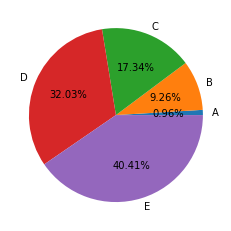

In [ ]:
plt.pie(grouping['user_id'], labels = grouping['user_income_grouping'], autopct='%.2f%%')
plt.show()

Insights so far:
- Most of our users have **income less than 10M rupiah per month**, with its percentage of around 42.8%
- Followed by 10-50M at 32.9%, 50-100M at 15.8%, 100-500M at 7.7%, and more than 500M at 0.78%

### How is the demographic in the data?

In [ ]:
#Count user id based on their gender
grouping = df_final.groupby('user_gender')['user_id'].count()
grouping = grouping.reset_index()
grouping

,user_gender,user_id
0,Female,2221
1,Male,3084


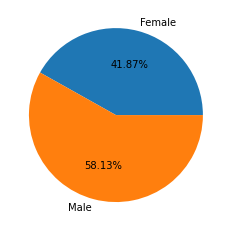

In [ ]:
plt.pie(grouping['user_id'], labels = grouping['user_gender'], autopct='%.2f%%')
plt.show()

In [ ]:
#Create age grouping for easier analysis

df_age = df_final.copy()

age = df_final['user_age']

df_age.loc[(age <= 24), 'user_age_category'] = 'A'
df_age.loc[(age > 24) & (age <= 34), 'user_age_category'] = 'B'
df_age.loc[(age > 34) & (age <= 44), 'user_age_category'] = 'C'
df_age.loc[(age > 44) & (age <= 54), 'user_age_category'] = 'D'
df_age.loc[(age > 54) & (age <= 64), 'user_age_category'] = 'E'
df_age.loc[(age > 64), 'user_age_category'] = 'F'

In [ ]:
grouping = df_age.groupby('user_age_category')['user_id'].count()
grouping = grouping.reset_index()
grouping

,user_age_category,user_id
0,A,2423
1,B,1903
2,C,674
3,D,261
4,E,39
5,F,5


In [ ]:
grouping['cum_percentage'] = np.round(grouping['user_id'].cumsum()/grouping['user_id'].sum() * 100,2)
grouping

,user_age_category,user_id,cum_percentage
0,A,2423,45.670
1,B,1903,81.550
2,C,674,94.250
3,D,261,99.170
4,E,39,99.910
5,F,5,100.000


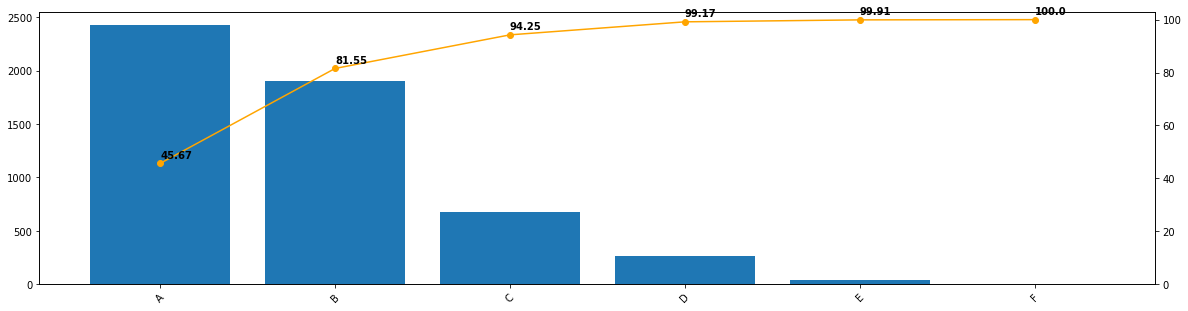

In [ ]:
fig,ax = plt.subplots(figsize=(20, 5))

x = grouping['user_age_category']
y_bar = grouping['user_id']
y_line = grouping['cum_percentage']

ax.bar(x,y_bar)

plt.xticks(rotation = 45)

ax2 = ax.twinx()
ax2.plot(x,y_line, marker = 'o', color = 'orange')
ax2.set_ylim(ymin=0)

for i, v in enumerate(y_line):
    vmil = round(v,2)
    plt.text(i, v+2, str(vmil), fontweight='bold')

plt.show()

Insights so far:
- Most of our users are **male**, with its percentage of around 63.9%
- Most of our users are **under 24**, with its percentage of around 49.7%
- Followed by 24-34 at 34.2%, 35-44 at 11%, 45-54 at 4.3%, and the rest are under 1%. Which means **teenagers and young adults made up most of our demographic user** for around 83.8%

### How many users buy products in each mutual fund

In [ ]:
#Create age grouping for easier analysis

df_funds = df_final.copy()

df_funds.loc[(df_final['saham_invested_amount'] != 0), 'user_saham'] = 'YES'
df_funds.loc[(df_final['pasar_uang_invested_amount'] != 0), 'user_pu'] = 'YES'
df_funds.loc[(df_final['pendapatan_tetap_invested_amount'] != 0), 'user_pt'] = 'YES'
df_funds.loc[(df_final['campuran_invested_amount'] != 0), 'user_campur'] = 'YES'

In [ ]:
count_saham = (df_funds['user_saham'] == 'YES').sum()
count_pu = (df_funds['user_pu'] == 'YES').sum()
count_pt = (df_funds['user_pt'] == 'YES').sum()
count_campur = (df_funds['user_campur'] == 'YES').sum()

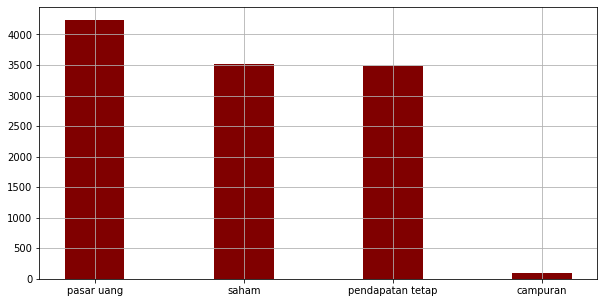

In [ ]:
# creating the dataset
data = {'pasar uang':count_pu,
        'saham':count_saham,
        'pendapatan tetap':count_pt,
        'campuran':count_campur}
x = list(data.keys())
y = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.grid(zorder=0)
plt.bar(x, y,
        color ='maroon',
        width = 0.4)

plt.show()

Insights so far:
- More than 4000 of our users have purchased **Pasar Uang**
- Followed by Saham and Pendapatan Tetap for around 3300
- Campuran have the lowest, which is less than 100 users purchased this product

## Identifying trends

- Is there any trend on the transaction?
- How about transaction for each product?

### Is there any trend on the transaction?

In [ ]:
#Check for buy transaction
df_transactions_fund = df_transactions[['date', 'total_buy_transaction_amount']]

df_transactions_fund = df_transactions_fund.sort_values('date')
df_transactions_fund = df_transactions_fund.groupby('date').sum()
df_transactions_fund = df_transactions_fund.reset_index()
df_transactions_fund.head(10)

,date,total_buy_transaction_amount
0,2021-08-04,0.000
1,2021-08-05,14570000.000
2,2021-08-06,20880000.000
3,2021-08-09,40975000.000
4,2021-08-10,24922709.000
5,2021-08-11,308536157.000
6,2021-08-12,0.000
7,2021-08-13,404568000.000
8,2021-08-16,457253711.000
9,2021-08-17,52534746.000


In [ ]:
#Check for sell transaction
df_transactions_fund2 = df_transactions[['date', 'total_sell_transaction_amount']]

df_transactions_fund2['total_sell_transaction_amount'] = np.abs(df_transactions_fund2['total_sell_transaction_amount'])

df_transactions_fund2 = df_transactions_fund2.sort_values('date')
df_transactions_fund2 = df_transactions_fund2.groupby('date').sum()
df_transactions_fund2 = df_transactions_fund2.reset_index()
df_transactions_fund2.head(10)

<ipython-input-312-99fea192031a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transactions_fund2['total_sell_transaction_amount'] = np.abs(df_transactions_fund2['total_sell_transaction_amount'])


,date,total_sell_transaction_amount
0,2021-08-04,0.000
1,2021-08-05,700000.000
2,2021-08-06,1124930.000
3,2021-08-09,57814132.000
4,2021-08-10,188350000.000
5,2021-08-11,21795994.000
6,2021-08-12,13331504.000
7,2021-08-13,8529745.000
8,2021-08-16,13906158.000
9,2021-08-17,19524237.000


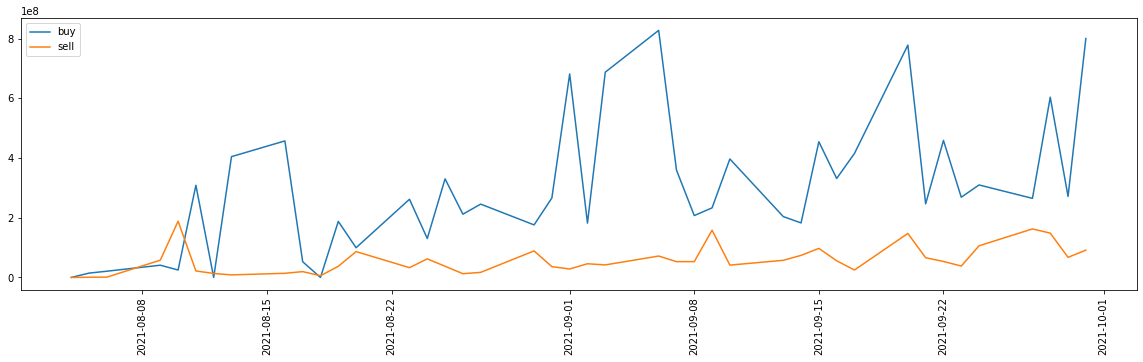

In [ ]:
plt.figure(figsize = (20, 5))

plt.xticks(rotation = 90)
plt.plot(df_transactions_fund['date'], df_transactions_fund['total_buy_transaction_amount'], label = 'buy')
plt.plot(df_transactions_fund2['date'], df_transactions_fund2['total_sell_transaction_amount'],  label = 'sell')

plt.legend()
plt.show()

Insights so far:
- There are increase of buying transaction during the period between end of a month to early next month. Further observation for the next upcoming months needed to ensure the analysis result
- And vice versa, there are steep decrease in between the peaks.
- There are no noticeable trend in the selling transaction. However, the transaction itself is ongoing towards bullish pattern. Further observation for the next upcoming months needed to ensure the analysis result

### How about transaction for each product?

In [ ]:
#Check for buy_saham transaction
df_transactions_saham_buy = df_transactions[['date', 'buy_saham_transaction_amount']]

df_transactions_saham_buy = df_transactions_saham_buy.sort_values('date')
df_transactions_saham_buy = df_transactions_saham_buy.groupby('date').sum()
df_transactions_saham_buy = df_transactions_saham_buy.reset_index()
df_transactions_saham_buy.head(10)

,date,buy_saham_transaction_amount
0,2021-08-04,0.000
1,2021-08-05,1430000.000
2,2021-08-06,4010000.000
3,2021-08-09,4130000.000
4,2021-08-10,5779994.000
5,2021-08-11,21455000.000
6,2021-08-12,0.000
7,2021-08-13,26175000.000
8,2021-08-16,18005920.000
9,2021-08-17,12060000.000


In [ ]:
#Check for sell_saham transaction
df_transactions_saham_sell = df_transactions[['date', 'sell_saham_transaction_amount']]

df_transactions_saham_sell['sell_saham_transaction_amount'] = np.abs(df_transactions_saham_sell['sell_saham_transaction_amount'])

df_transactions_saham_sell = df_transactions_saham_sell.sort_values('date')
df_transactions_saham_sell = df_transactions_saham_sell.groupby('date').sum()
df_transactions_saham_sell = df_transactions_saham_sell.reset_index()
df_transactions_saham_sell.head(10)

<ipython-input-315-ce455b6a074e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transactions_saham_sell['sell_saham_transaction_amount'] = np.abs(df_transactions_saham_sell['sell_saham_transaction_amount'])


,date,sell_saham_transaction_amount
0,2021-08-04,0.000
1,2021-08-05,0.000
2,2021-08-06,600000.000
3,2021-08-09,5441108.000
4,2021-08-10,1320000.000
5,2021-08-11,3089994.000
6,2021-08-12,2714538.000
7,2021-08-13,2157000.000
8,2021-08-16,4752892.000
9,2021-08-17,2319933.000


In [ ]:
#Check for buy_pu transaction
df_transactions_pasar_uang_buy = df_transactions[['date', 'buy_pasar_uang_transaction_amount']]

df_transactions_pasar_uang_buy = df_transactions_pasar_uang_buy.sort_values('date')
df_transactions_pasar_uang_buy = df_transactions_pasar_uang_buy.groupby('date').sum()
df_transactions_pasar_uang_buy = df_transactions_pasar_uang_buy.reset_index()
df_transactions_pasar_uang_buy.head(10)

,date,buy_pasar_uang_transaction_amount
0,2021-08-04,0.000
1,2021-08-05,2730000.000
2,2021-08-06,1555000.000
3,2021-08-09,6030000.000
4,2021-08-10,14022715.000
5,2021-08-11,261691127.000
6,2021-08-12,0.000
7,2021-08-13,96238000.000
8,2021-08-16,16512791.000
9,2021-08-17,17534588.000


In [ ]:
#Check for sell_pu transaction
df_transactions_pasar_uang_sell = df_transactions[['date', 'sell_pasar_uang_transaction_amount']]

df_transactions_pasar_uang_sell['sell_pasar_uang_transaction_amount'] = np.abs(df_transactions_pasar_uang_sell['sell_pasar_uang_transaction_amount'])

df_transactions_pasar_uang_sell = df_transactions_pasar_uang_sell.sort_values('date')
df_transactions_pasar_uang_sell = df_transactions_pasar_uang_sell.groupby('date').sum()
df_transactions_pasar_uang_sell = df_transactions_pasar_uang_sell.reset_index()
df_transactions_pasar_uang_sell.head(10)

<ipython-input-317-cada2f0b94ba>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transactions_pasar_uang_sell['sell_pasar_uang_transaction_amount'] = np.abs(df_transactions_pasar_uang_sell['sell_pasar_uang_transaction_amount'])


,date,sell_pasar_uang_transaction_amount
0,2021-08-04,0.000
1,2021-08-05,700000.000
2,2021-08-06,80000.000
3,2021-08-09,50780000.000
4,2021-08-10,186310000.000
5,2021-08-11,1246000.000
6,2021-08-12,4966640.000
7,2021-08-13,5382715.000
8,2021-08-16,4492656.000
9,2021-08-17,10905254.000


In [ ]:
#Check for buy_pt transaction
df_transactions_pendapatan_tetap_buy = df_transactions[['date', 'buy_pendapatan_tetap_transaction_amount']]

df_transactions_pendapatan_tetap_buy = df_transactions_pendapatan_tetap_buy.sort_values('date')
df_transactions_pendapatan_tetap_buy = df_transactions_pendapatan_tetap_buy.groupby('date').sum()
df_transactions_pendapatan_tetap_buy = df_transactions_pendapatan_tetap_buy.reset_index()
df_transactions_pendapatan_tetap_buy.head(10)

,date,buy_pendapatan_tetap_transaction_amount
0,2021-08-04,0.000
1,2021-08-05,10410000.000
2,2021-08-06,6315000.000
3,2021-08-09,5315000.000
4,2021-08-10,5020000.000
5,2021-08-11,12890030.000
6,2021-08-12,0.000
7,2021-08-13,262155000.000
8,2021-08-16,414635000.000
9,2021-08-17,12940158.000


In [ ]:
#Check for sell_pt transaction
df_transactions_pendapatan_tetap_sell = df_transactions[['date', 'sell_pendapatan_tetap_transaction_amount']]

df_transactions_pendapatan_tetap_sell['sell_pendapatan_tetap_transaction_amount'] = np.abs(df_transactions_pendapatan_tetap_sell['sell_pendapatan_tetap_transaction_amount'])

df_transactions_pendapatan_tetap_sell = df_transactions_pendapatan_tetap_sell.sort_values('date')
df_transactions_pendapatan_tetap_sell = df_transactions_pendapatan_tetap_sell.groupby('date').sum()
df_transactions_pendapatan_tetap_sell = df_transactions_pendapatan_tetap_sell.reset_index()
df_transactions_pendapatan_tetap_sell.head(10)

<ipython-input-319-cc6cb767ab2f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transactions_pendapatan_tetap_sell['sell_pendapatan_tetap_transaction_amount'] = np.abs(df_transactions_pendapatan_tetap_sell['sell_pendapatan_tetap_transaction_amount'])


,date,sell_pendapatan_tetap_transaction_amount
0,2021-08-04,0.000
1,2021-08-05,0.000
2,2021-08-06,444930.000
3,2021-08-09,1593024.000
4,2021-08-10,720000.000
5,2021-08-11,7460000.000
6,2021-08-12,5650326.000
7,2021-08-13,990030.000
8,2021-08-16,4660610.000
9,2021-08-17,2299050.000


In [ ]:
#Check for buy_campur transaction
df_transactions_campuran_buy = df_transactions[['date', 'buy_campuran_transaction_amount']]

df_transactions_campuran_buy = df_transactions_campuran_buy.sort_values('date')
df_transactions_campuran_buy = df_transactions_campuran_buy.groupby('date').sum()
df_transactions_campuran_buy = df_transactions_campuran_buy.reset_index()
df_transactions_campuran_buy.head(10)

,date,buy_campuran_transaction_amount
0,2021-08-04,0.000
1,2021-08-05,0.000
2,2021-08-06,9000000.000
3,2021-08-09,25500000.000
4,2021-08-10,100000.000
5,2021-08-11,12500000.000
6,2021-08-12,0.000
7,2021-08-13,20000000.000
8,2021-08-16,8100000.000
9,2021-08-17,10000000.000


In [ ]:
#Check for sell_campur transaction
df_transactions_campuran_sell = df_transactions[['date', 'sell_campuran_transaction_amount']]

df_transactions_campuran_sell['sell_campuran_transaction_amount'] = np.abs(df_transactions_campuran_sell['sell_campuran_transaction_amount'])

df_transactions_campuran_sell = df_transactions_campuran_sell.sort_values('date')
df_transactions_campuran_sell = df_transactions_campuran_sell.groupby('date').sum()
df_transactions_campuran_sell = df_transactions_campuran_sell.reset_index()
df_transactions_campuran_sell.head(10)

<ipython-input-321-ed16eef96cdf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transactions_campuran_sell['sell_campuran_transaction_amount'] = np.abs(df_transactions_campuran_sell['sell_campuran_transaction_amount'])


,date,sell_campuran_transaction_amount
0,2021-08-04,0.000
1,2021-08-05,0.000
2,2021-08-06,0.000
3,2021-08-09,0.000
4,2021-08-10,0.000
5,2021-08-11,10000000.000
6,2021-08-12,0.000
7,2021-08-13,0.000
8,2021-08-16,0.000
9,2021-08-17,4000000.000


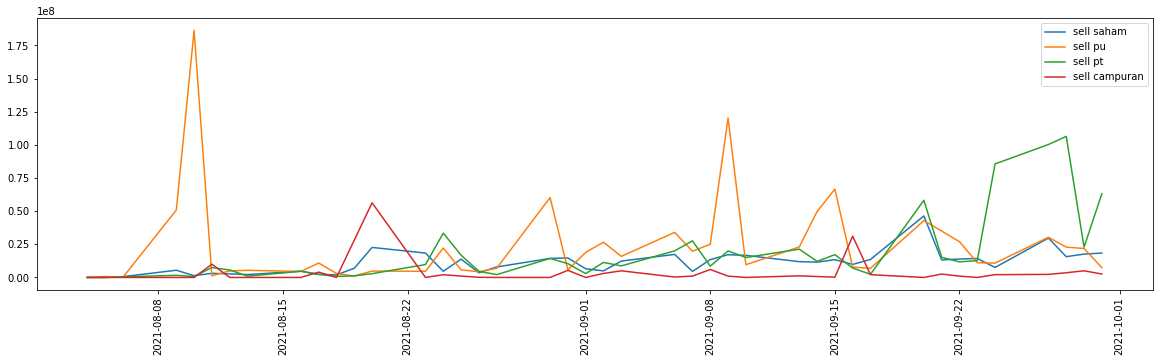

In [ ]:
#show line chart for selling transaction for all product
plt.figure(figsize = (20, 5))

plt.xticks(rotation = 90)
plt.plot(df_transactions_saham_sell['date'], df_transactions_saham_sell['sell_saham_transaction_amount'],  label = 'sell saham')

plt.plot(df_transactions_pasar_uang_sell['date'], df_transactions_pasar_uang_sell['sell_pasar_uang_transaction_amount'],  label = 'sell pu')

plt.plot(df_transactions_pendapatan_tetap_sell['date'], df_transactions_pendapatan_tetap_sell['sell_pendapatan_tetap_transaction_amount'],  label = 'sell pt')

plt.plot(df_transactions_campuran_sell['date'], df_transactions_campuran_sell['sell_campuran_transaction_amount'],  label = 'sell campuran')

plt.legend()
plt.show()

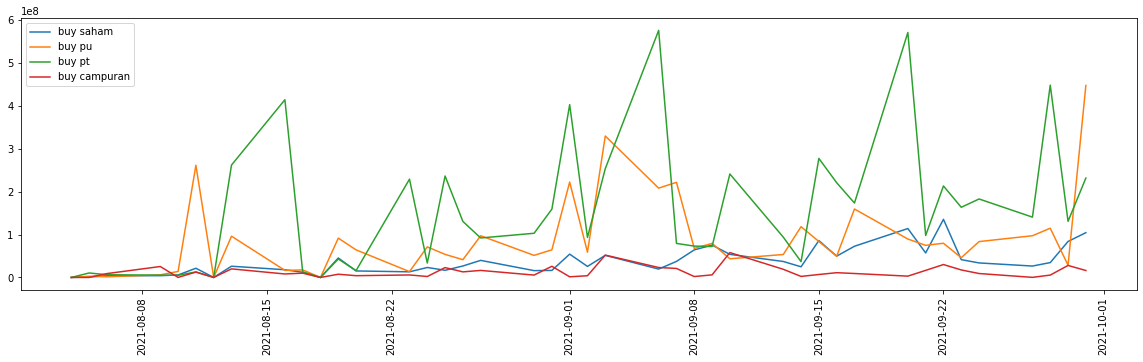

In [ ]:
#show line chart for buying transaction for all product
plt.figure(figsize = (20, 5))

plt.xticks(rotation = 90)
plt.plot(df_transactions_saham_buy['date'], df_transactions_saham_buy['buy_saham_transaction_amount'], label = 'buy saham')

plt.plot(df_transactions_pasar_uang_buy['date'], df_transactions_pasar_uang_buy['buy_pasar_uang_transaction_amount'], label = 'buy pu')

plt.plot(df_transactions_pendapatan_tetap_buy['date'], df_transactions_pendapatan_tetap_buy['buy_pendapatan_tetap_transaction_amount'], label = 'buy pt')

plt.plot(df_transactions_campuran_buy['date'], df_transactions_campuran_buy['buy_campuran_transaction_amount'], label = 'buy campuran')

plt.legend()
plt.show()

Insight so far:
- There's a spike of increase of selling Pasar Uang after 8th in every observed months
- Even though Pasar Uang dominates the trend during the observation, there's a sudden spike of increase of selling Pendapatan Tetap before October
- Pendapatan Tetap's buying transaction always active besides between 22th until the end of the month
- Pasar Uang's buying transaction usually follow similar trend to Pendapatan Tetap, unless during around 10th of August and 30th of September where it spikes when there are decrease of activities in Pasar Uang.
- Campuran always underperform in both transactions


# Segmentation

In [ ]:
#import necessary libraries for clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
from sklearn import cluster

import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs

In [ ]:
df_segmentation = df_final.copy()
df_segmentation

,user_id,registration_import_datetime,user_gender,user_age,end_of_month_invested_amount,total_buy_amount,total_sell_amount,user_income_grouping,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount
1,3802293,2021-08-15 09:31:24,Female,47,13500000,8500000,0,A,8920000.000,1350000.000,3230000.000,0.000
45,3839208,2021-08-15 20:17:27,Male,47,5000000,4000000,0,A,3300000.000,500000.000,1200000.000,0.000
95,3734478,2021-08-01 14:02:11,Female,60,1000000,0,0,A,0.000,1000000.000,0.000,0.000
105,3913945,2021-08-27 11:19:32,Male,51,300000,300000,100000,A,160000.000,30000.000,110000.000,0.000
136,3932521,2021-08-30 13:50:51,Male,47,4546551,3000000,453449,A,16551.000,4100000.000,430000.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...
8241,1077164,2021-08-04 16:23:00,Male,49,100000,130000,60000,E,10000.000,70000.000,20000.000,0.000
8245,3753316,2021-08-04 16:40:56,Male,49,94202,0,405798,E,0.000,10056.000,84146.000,0.000
8247,3934589,2021-09-03 14:45:27,Male,49,400000,160000,0,E,40000.000,210000.000,150000.000,0.000
8257,4086984,2021-09-18 15:27:45,Female,49,150000,0,0,E,0.000,50000.000,100000.000,0.000


In [ ]:
df_segmentation_feat = df_segmentation[["user_id","end_of_month_invested_amount","user_age"]]
df_segmentation_feat

,user_id,end_of_month_invested_amount,user_age
1,3802293,13500000,47
45,3839208,5000000,47
95,3734478,1000000,60
105,3913945,300000,51
136,3932521,4546551,47
...,...,...,...
8241,1077164,100000,49
8245,3753316,94202,49
8247,3934589,400000,49
8257,4086984,150000,49


Insights so far:
- We will create our segmentation based on user's age and their total invested amount
- As the data will contain outliers based on the chracteristic of the datas itself, we will be using Robust Scaling to proceed

## Robust Scaling

In [ ]:
# Define Robust Scale dataset
rs_scale_df = df_segmentation_feat.copy()
column = df_segmentation_feat.columns.to_list()
# using RobustScaler Scaler
rs_scaler = RobustScaler()
rs_scale_df[['end_of_month_invested_amount', 'user_age']] = rs_scaler.fit_transform(rs_scale_df[['end_of_month_invested_amount', 'user_age']])

<AxesSubplot:xlabel='end_of_month_invested_amount', ylabel='user_age'>

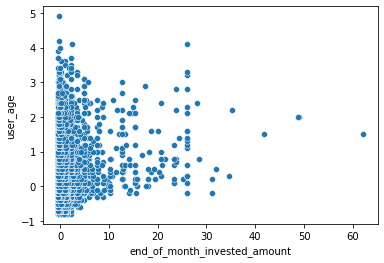

In [ ]:
sns.scatterplot (data = rs_scale_df, x='end_of_month_invested_amount', y='user_age')

Insights so far:
- We need to find the K as the scatterplot doesn't give an obvious line between each potential groupings

## Determine K

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

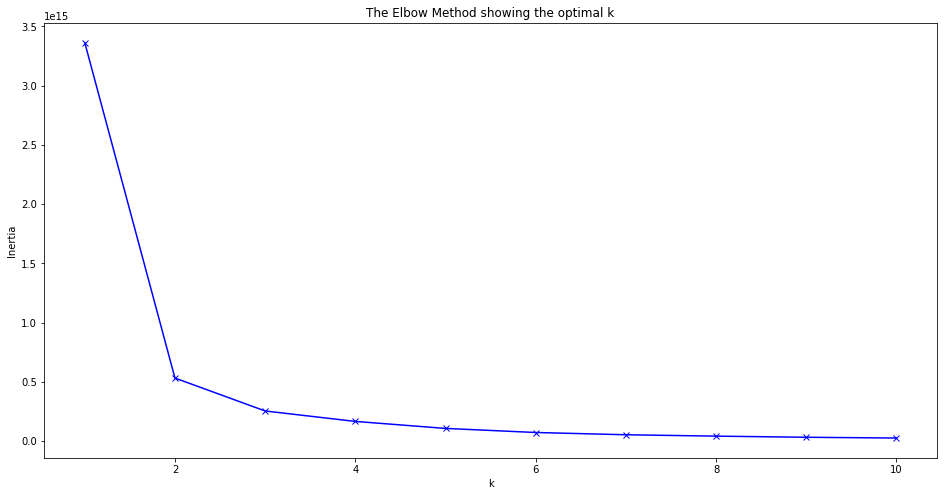

[3362768445981960.0, 531417270020936.5, 253513904503751.0, 165421165998847.66, 106358293926423.61, 71864575895104.94, 52877562053223.03, 41206356280633.16, 31640728384446.336, 25161976794509.4]


In [ ]:
# K-Means Clustering
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k,init='k-means++')
    kmeanModel.fit(rs_scale_df)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()
print(distortions)

In [ ]:
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
def silhoutte_analysis(data,cluster=[2,3,4]):
    X = data.to_numpy()

    range_n_clusters = cluster

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10, init = 'k-means++')
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.8958647908003339


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.7795633002240563


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.6444329130278744


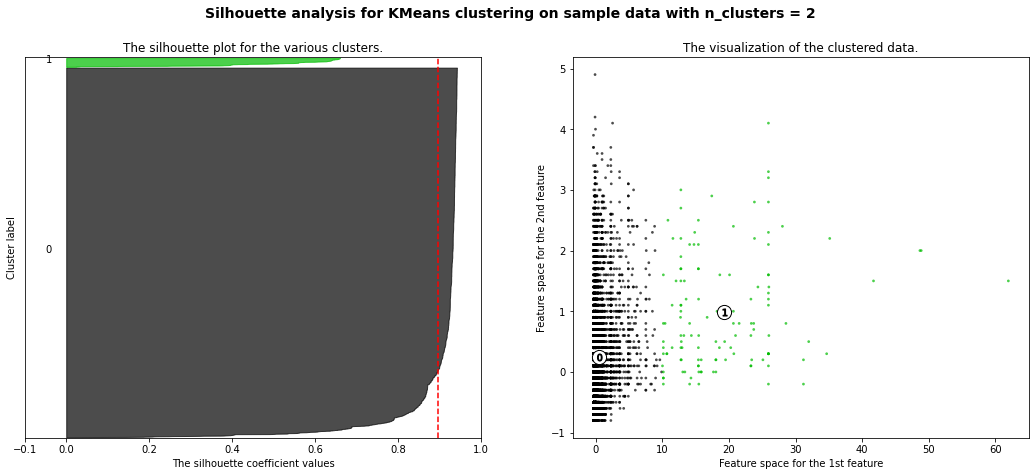

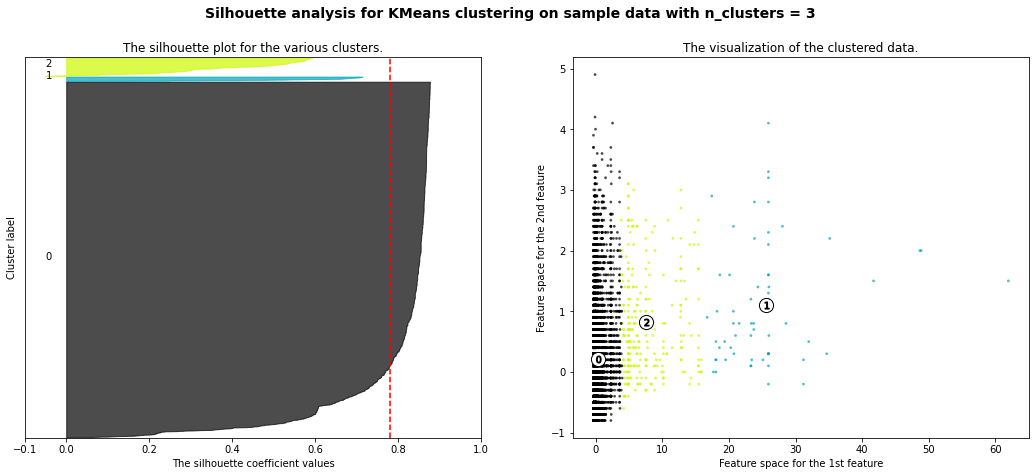

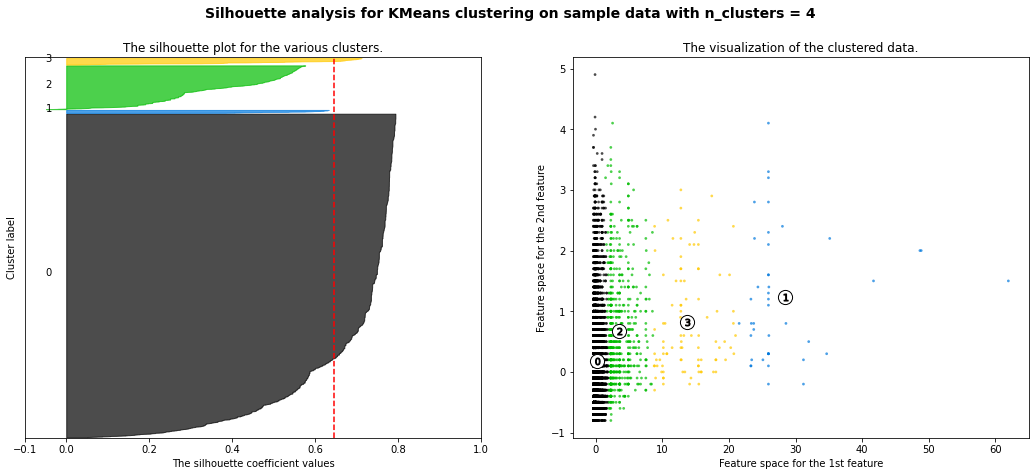

In [ ]:
silhoutte_analysis(rs_scale_df[['end_of_month_invested_amount', 'user_age']],list(range(2,5)))

Insights so far:
- Even though it shows that 2 is the optimal k-value, we will choose 3 as its the nearest to the optimal that still makes sense if we want to do clustering (if we use two grouping, it's better to do categorical grouping instead)

## Clustering

In [ ]:
#make cluster
Cluster = rs_scale_df.copy()

# cluster_model = KMeans(n_clusters=2)
cluster_model = KMeans(n_clusters=3)
# cluster_model = KMeans(n_clusters=4)
cluster_model.fit_predict(Cluster[['end_of_month_invested_amount', 'user_age']])
Cluster['cluster'] = cluster_model.labels_
Cluster.head()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,user_id,end_of_month_invested_amount,user_age,cluster
1,3802293,35.132,2.200,1
45,3839208,12.763,2.200,2
95,3734478,2.237,3.500,0
105,3913945,0.395,2.600,0
136,3932521,11.570,2.200,2


<AxesSubplot:xlabel='cluster', ylabel='end_of_month_invested_amount'>

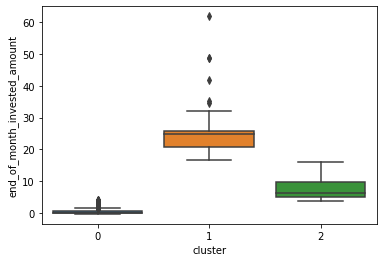

In [ ]:
# Number of transaction
sns.boxplot (data = Cluster , x ='cluster' , y ='end_of_month_invested_amount')

<AxesSubplot:xlabel='cluster', ylabel='user_age'>

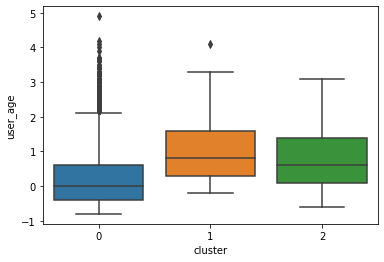

In [ ]:
# Number of transaction
sns.boxplot (data = Cluster , x ='cluster' , y ='user_age')

Insights so far:
- The result with 3 cluster groups already MECE enough

## Segmentation EDA

In [ ]:
df_segmented = Cluster.merge(df_segmentation, how= 'inner', on = 'user_id')
df_segmented

,user_id,end_of_month_invested_amount_x,user_age_x,cluster,registration_import_datetime,user_gender,user_age_y,end_of_month_invested_amount_y,total_buy_amount,total_sell_amount,user_income_grouping,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount
0,3802293,35.132,2.200,1,2021-08-15 09:31:24,Female,47,13500000,8500000,0,A,8920000.000,1350000.000,3230000.000,0.000
1,3839208,12.763,2.200,2,2021-08-15 20:17:27,Male,47,5000000,4000000,0,A,3300000.000,500000.000,1200000.000,0.000
2,3734478,2.237,3.500,0,2021-08-01 14:02:11,Female,60,1000000,0,0,A,0.000,1000000.000,0.000,0.000
3,3913945,0.395,2.600,0,2021-08-27 11:19:32,Male,51,300000,300000,100000,A,160000.000,30000.000,110000.000,0.000
4,3932521,11.570,2.200,2,2021-08-30 13:50:51,Male,47,4546551,3000000,453449,A,16551.000,4100000.000,430000.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5300,1077164,-0.132,2.400,0,2021-08-04 16:23:00,Male,49,100000,130000,60000,E,10000.000,70000.000,20000.000,0.000
5301,3753316,-0.147,2.400,0,2021-08-04 16:40:56,Male,49,94202,0,405798,E,0.000,10056.000,84146.000,0.000
5302,3934589,0.658,2.400,0,2021-09-03 14:45:27,Male,49,400000,160000,0,E,40000.000,210000.000,150000.000,0.000
5303,4086984,0.000,2.400,0,2021-09-18 15:27:45,Female,49,150000,0,0,E,0.000,50000.000,100000.000,0.000


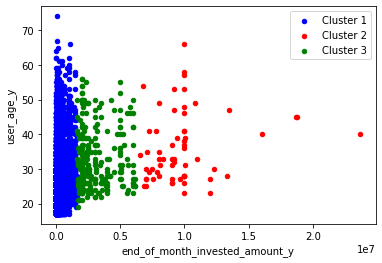

In [ ]:
cluster_scatter = df_segmented[df_segmented['cluster'] == 0].plot.scatter(x='end_of_month_invested_amount_y', y='user_age_y', c='blue', label='Cluster 1')
cluster_scatter = df_segmented[df_segmented['cluster'] == 1].plot.scatter(x='end_of_month_invested_amount_y', y='user_age_y', c='red', label='Cluster 2', ax = cluster_scatter)
cluster_scatter = df_segmented[df_segmented['cluster'] == 2].plot.scatter(x='end_of_month_invested_amount_y', y='user_age_y', c='green', label='Cluster 3', ax = cluster_scatter)

### Descriptive Statistics

In [ ]:
df_segmented.groupby('cluster',as_index = False)[['end_of_month_invested_amount_y','user_age_y']].agg(['count','mean','min','max','median']).T

cluster                                         0            1           2
end_of_month_invested_amount_y count     4993.000       62.000     250.000
                               mean    271549.446  9849923.532 3035406.108
                               min        114.000  6500000.000 1600000.000
                               max    1650000.000 23700000.000 6170000.000
                               median  125000.000  9542522.000 2500000.000
user_age_y                     count     4993.000       62.000     250.000
                               mean        27.214       36.016      33.188
                               min         17.000       23.000      19.000
                               max         74.000       66.000      56.000
                               median      25.000       33.000      31.000

Insights so far:
- Cluster 0 has the most member with 4993, yet has the lowest invested avg in Rp. 271.549
- On the other hand, Cluster 1 has the least member with 62 but has the highest invested avg in Rp. 9.849.923
- Cluster 0 avg age is the lowest at around 27, while Cluster 1 avg age is the highest at around 36

In [ ]:
pd.set_option('display.max_columns',None)
df_segmented.head(5)

,user_id,end_of_month_invested_amount_x,user_age_x,cluster,registration_import_datetime,user_gender,user_age_y,end_of_month_invested_amount_y,total_buy_amount,total_sell_amount,user_income_grouping,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount
0,3802293,35.132,2.200,1,2021-08-15 09:31:24,Female,47,13500000,8500000,0,A,8920000.000,1350000.000,3230000.000,0.000
1,3839208,12.763,2.200,2,2021-08-15 20:17:27,Male,47,5000000,4000000,0,A,3300000.000,500000.000,1200000.000,0.000
2,3734478,2.237,3.500,0,2021-08-01 14:02:11,Female,60,1000000,0,0,A,0.000,1000000.000,0.000,0.000
3,3913945,0.395,2.600,0,2021-08-27 11:19:32,Male,51,300000,300000,100000,A,160000.000,30000.000,110000.000,0.000
4,3932521,11.570,2.200,2,2021-08-30 13:50:51,Male,47,4546551,3000000,453449,A,16551.000,4100000.000,430000.000,0.000


### User Gender

In [ ]:
df_segmented.groupby(['cluster','user_gender'], as_index = False)['user_id'].count()

,cluster,user_gender,user_id
0,0,Female,2085
1,0,Male,2908
2,1,Female,19
3,1,Male,43
4,2,Female,117
5,2,Male,133


Insights so far:
- Cluster 0 Female = 41.75%
- Cluster 0 Male = 58.25%
- Cluster 1 Female = 30.65%
- Cluster 1 Male = 69.35%
- Cluster 2 Female = 46.8%
- Cluster 2 Male = 53.2%

### User Age

In [ ]:
df_segmented.groupby(['cluster'], as_index = False)['user_age_y'].mean()

,cluster,user_age_y
0,0,27.214
1,1,36.016
2,2,33.188


Insights so far:
- Cluster 0 avg age is the lowest at around 27, while Cluster 1 avg age is the highest at around 36

### End Month Invested

In [ ]:
df_segmented.groupby(['cluster'], as_index = False)['end_of_month_invested_amount_y'].mean()

,cluster,end_of_month_invested_amount_y
0,0,271549.446
1,1,9849923.532
2,2,3035406.108


Insights so far:
- Cluster 0 has the most member with 4993, yet has the lowest invested avg in Rp. 271.549
- On the other hand, Cluster 1 has the least member with 62 but has the highest invested avg in Rp. 9.849.923

### Total Buy

In [ ]:
df_segmented.groupby(['cluster'], as_index = False)['total_buy_amount'].mean()

,cluster,total_buy_amount
0,0,137948.881
1,1,4744663.887
2,2,2119671.056


Insights so far:
- Cluster 0 = 137948.881
- Cluster 1 = 4744663.887
- Cluster 2 = 2119671.056

### Total Sell

In [ ]:
df_segmented.groupby(['cluster'], as_index = False)['total_sell_amount'].mean()

,cluster,total_sell_amount
0,0,71747.911
1,1,558111.484
2,2,864261.608


Insights so far:
- Cluster 0 = 71747.911
- Cluster 1 = 558111.484
- Cluster 2 = 864261.608

### User Income Groups


In [ ]:
df_segmented.groupby(['cluster','user_income_grouping'], as_index = False)['user_id'].count()

,cluster,user_income_grouping,user_id
0,0,A,21
1,0,B,323
2,0,C,819
3,0,D,1686
4,0,E,2144
5,1,A,14
6,1,B,48
7,2,A,16
8,2,B,120
9,2,C,101


Insights so far:
- Cluster 0 = A (0.42%), B (6.47%), C (16.4%), D (33.77%), E (42.94%)
- Cluster 1 = A (22.58%), B (77.42%)
- Cluster 2 = B (48%), C (40.4%), D (11.6%)

### Saham Invested

In [ ]:
#create new dummy table that will filter the 0s
df_segmented_temp = df_segmented[(df_segmented["saham_invested_amount"] != 0)]
df_segmented_temp = df_segmented_temp[["cluster","saham_invested_amount"]]

In [ ]:
df_segmented_temp.groupby(['cluster'], as_index = False)['saham_invested_amount'].count()

,cluster,saham_invested_amount
0,0,3297
1,1,41
2,2,184


In [ ]:
df_segmented_temp.groupby(['cluster'], as_index = False)['saham_invested_amount'].mean()

,cluster,saham_invested_amount
0,0,143251.512
1,1,4379086.220
2,2,1277488.609


Insights so far:
- 66% of Cluster 0 invested in saham, with avg of 143.251
- 66.13% of Cluster 1 invested in saham, with avg of 4.379.086
- 73.6% of Cluster 2 invested in saham, with avg of 1.277.488

### Pasar Uang Invested

In [ ]:
#create new dummy table that will filter the 0s
df_segmented_temp = df_segmented[(df_segmented["pasar_uang_invested_amount"] != 0)]
df_segmented_temp = df_segmented_temp[["cluster","pasar_uang_invested_amount"]]

In [ ]:
df_segmented_temp.groupby(['cluster'], as_index = False)['pasar_uang_invested_amount'].count()

,cluster,pasar_uang_invested_amount
0,0,3983
1,1,46
2,2,208


In [ ]:
df_segmented_temp.groupby(['cluster'], as_index = False)['pasar_uang_invested_amount'].mean()

,cluster,pasar_uang_invested_amount
0,0,97442.094
1,1,3689235.652
2,2,947066.452


Insights so far:
- 79.78% of Cluster 0 invested in pu, with avg of 97.442
- 74.19% of Cluster 1 invested in pu, with avg of 3.689.235
- 83.2% of Cluster 2 invested in pu, with avg of 947.066

### Pendapatan Tetap Invested

In [ ]:
#create new dummy table that will filter the 0s
df_segmented_temp = df_segmented[(df_segmented["pendapatan_tetap_invested_amount"] != 0)]
df_segmented_temp = df_segmented_temp[["cluster","pendapatan_tetap_invested_amount"]]

In [ ]:
df_segmented_temp.groupby(['cluster'], as_index = False)['pendapatan_tetap_invested_amount'].count()

,cluster,pendapatan_tetap_invested_amount
0,0,3218
1,1,46
2,2,211


In [ ]:
df_segmented_temp.groupby(['cluster'], as_index = False)['pendapatan_tetap_invested_amount'].mean()

,cluster,pendapatan_tetap_invested_amount
0,0,143919.915
1,1,3643432.261
2,2,1337459.763


Insights so far:
- 64.45% of Cluster 0 invested in pt, with avg of 143.919
- 74.19% of Cluster 1 invested in pt, with avg of 3.643.432
- 84.4% of Cluster 2 invested in pt, with avg of 1.337.459

### Campuran Invested

In [ ]:
#create new dummy table that will filter the 0s
df_segmented_temp = df_segmented[(df_segmented["campuran_invested_amount"] != 0)]
df_segmented_temp = df_segmented_temp[["cluster","campuran_invested_amount"]]

In [ ]:
df_segmented_temp.groupby(['cluster'], as_index = False)['campuran_invested_amount'].count()

,cluster,campuran_invested_amount
0,0,57
1,1,11
2,2,27


In [ ]:
df_segmented_temp.groupby(['cluster'], as_index = False)['campuran_invested_amount'].mean()

,cluster,campuran_invested_amount
0,0,566666.667
1,1,8531818.182
2,2,1651844.111


Insights so far:
- 1.14% of Cluster 0 invested in campuran, with avg of 566.666
- 17.74% of Cluster 1 invested in campuran, with avg of 8.531.818
- 10.8% of Cluster 2 invested in campuran, with avg of 1.651.844